In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

- https://arxiv.org/abs/1805.00023 Mulders: Population as a function of stellar properties

In [385]:
# calculation of nu (distance factor for perturbation)
k=1.38e-16
mu=2.8
mp=1.67e-24
G=6.67e-8
fac=280
msun=2e33
au=1.5e13

In [386]:
nu=(k**0.5)*(mu**(-0.5))*(mp**(-0.5))*(G**(-0.5))*(fac**0.5)*(msun**(-0.5))*(au**1.5)

In [387]:
nu/au # 

0.030482390498411137

In [33]:
resf=['no_pert.csv','lo_pert.csv','hi_pert.csv']
for resfile in resf:
    dff=pd.read_csv(resfile)
    hzmin=0.75*(dff.emestar/2e33)**2
    hzmax=1.77*(dff.emestar/2e33)**2
    dff=dff[(dff['a(i)']>hzmin)&(dff['a(i)']<hzmax)]
    dff['mass']=dff['emepla(i)/emet']+dff['emegas(i)']
    dff=dff[dff.mass<6500] # approx. 20 jupiter masses
    nlist=['ident', 'com', 'nplanets', 'massbudget', 'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',  'qest','ngi','mtr','apert']
    
    rdata=np.zeros((len(np.unique(dff.ident)),len(nlist)))
    kk=0
    fpert=dff.fpert.iloc[0]
    for i in np.unique(dff.ident):    
        filter=dff.ident==i
        dummy=dff[filter]
        pmass=dummy.mass
        com=((pmass*dummy['a(i)']).sum())/pmass.sum()
        npl=len(dummy)
        mtot=pmass.sum()
        sigmag0=dummy.sigmag_0.iloc[0]
        effm=mtot*3e-6/(dummy.emed.iloc[0])
        rc=dummy.rc.iloc[0]
        ms=dummy.emestar.iloc[0]/2e33
        md=dummy.emed.iloc[0]*ms
        metal=dummy.emetal.iloc[0]
        taugas=dummy.taugas.iloc[0]   
        qest=dummy.qest.iloc[0]
        boogi=dummy.mass>10 # 10 earth masses as giant mass limit
        ngi=(boogi).sum()
        apert=dummy.apert.iloc[0]
        mtr=(dummy.mass[np.logical_not(boogi)]).sum()
        rdata[kk,:]=i,com,npl,mtot,effm,sigmag0,md,rc,ms,metal,taugas,qest,ngi,mtr,apert
        kk=kk+1
    pd.DataFrame(rdata,columns=nlist).to_csv('hz_%s.csv'%resfile[:-4])

In [34]:
dfhn=pd.read_csv('hz_no_pert.csv',index_col=None)
dfhn["gia"]=dfhn.ngi>0
dfhl=pd.read_csv('hz_lo_pert.csv',index_col=None)
dfhl["gia"]=dfhl.ngi>0
dfhh=pd.read_csv('hz_hi_pert.csv',index_col=None)
dfhh["gia"]=dfhh.ngi>0

In [65]:
dfpno=pd.read_csv('proc_no_pert.csv',index_col=None)
dfpno["gia"]=dfpno.ngi>0
dfplo=pd.read_csv('proc_lo_pert.csv',index_col=None)
dfplo["gia"]=dfplo.ngi>0
dfphi=pd.read_csv('proc_hi_pert.csv',index_col=None)
dfphi["gia"]=dfphi.ngi>0

In [66]:
dfhn.head()

Unnamed: 0  ident       com  nplanets  massbudget  massefficiency  \
0           0    6.0  0.752114       1.0    8.385053        0.000210   
1           1   16.0  1.944809       9.0    2.078874        0.000037   
2           2   17.0  0.520304       1.0    2.825963        0.000137   
3           3   22.0  1.502230      11.0    1.033778        0.000084   
4           4   24.0  0.726110       1.0    3.510325        0.000096   

      sigmag0        md         rc        ms     metal       taugas  \
0   75.740878  0.103391  47.343380  0.861595  0.021273  1790533.125   
1  118.543720  0.213987  45.042137  1.258747 -0.352459  1107031.750   
2   35.587738  0.045863  49.645451  0.739731  0.121866  9050091.000   
3   33.506526  0.039169  39.524826  1.058611  0.136733  1188361.500   
4  109.075208  0.082925  37.771751  0.753862 -0.099928  1472218.250   

        qest  ngi       mtr  apert    gia  
0   4.412694  0.0  8.385053    0.0  False  
1   4.469478  0.0  2.078874    0.0  False  
2   7.257983  0.0  2.825963    0.0  False  
3  16.342405  0.0  1.033778    0.0  False  
4   3.918911  0.0  3.510325    0.0  False

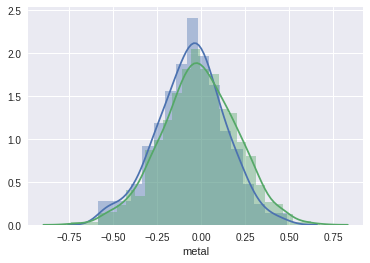

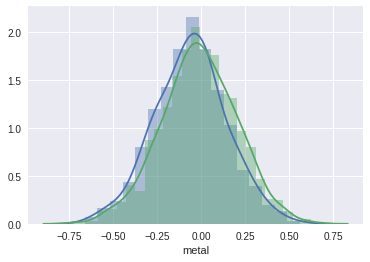

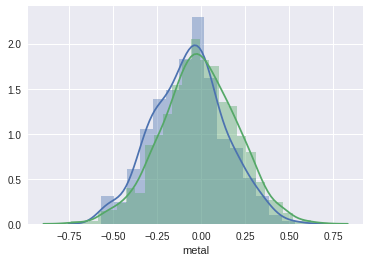

In [67]:
sns.distplot(dfhn.metal)
sns.distplot(dfpno.metal)
plt.show()
sns.distplot(dfhl.metal)
sns.distplot(dfplo.metal)
plt.show()
sns.distplot(dfhh.metal)
sns.distplot(dfphi.metal)

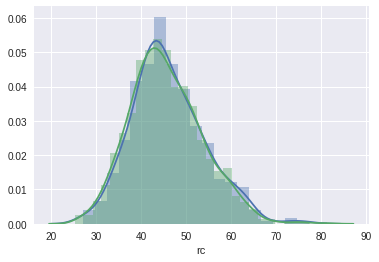

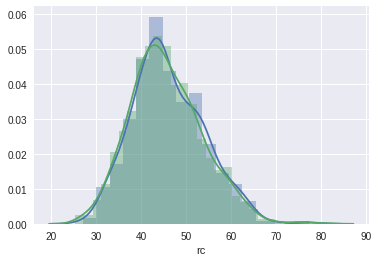

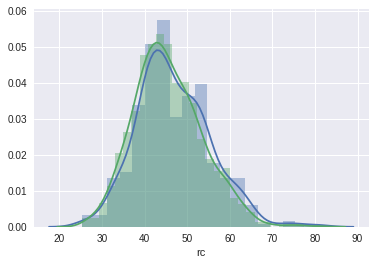

In [68]:
sns.distplot(dfhn.rc)
sns.distplot(dfpno.rc)
plt.show()
sns.distplot(dfhl.rc)
sns.distplot(dfplo.rc)
plt.show()
sns.distplot(dfhh.rc)
sns.distplot(dfphi.rc)
plt.show()

- Lower disk masses favor HZ planet formation (prob. related to migration)

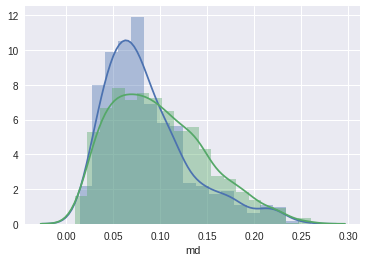

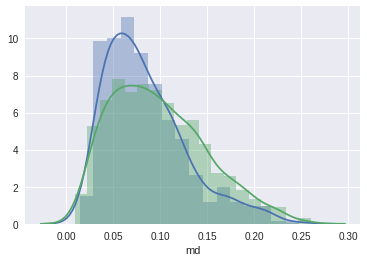

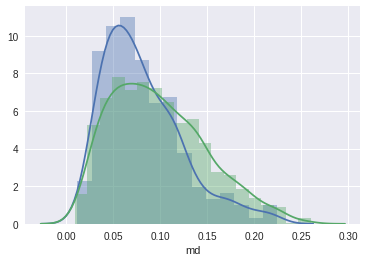

In [69]:
sns.distplot(dfhn.md) # same thing happens w sigmag_0, which is a function of md and ac, but there is no corr to ac
sns.distplot(dfpno.md)
plt.show()
sns.distplot(dfhl.md)
sns.distplot(dfplo.md)
plt.show()
sns.distplot(dfhh.md)
sns.distplot(dfphi.md)
plt.show()

- Lower taugas systems favor HZ planet formation

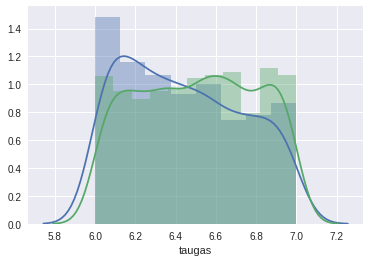

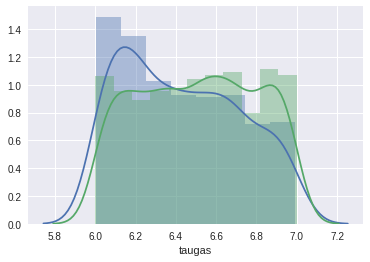

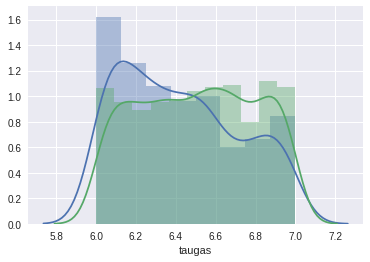

In [70]:
sns.distplot(np.log10(dfhn.taugas))
sns.distplot(np.log10(dfpno.taugas))
plt.show()
sns.distplot(np.log10(dfhl.taugas))
sns.distplot(np.log10(dfplo.taugas))
plt.show()
sns.distplot(np.log10(dfhh.taugas))
sns.distplot(np.log10(dfphi.taugas))
plt.show()

- Higher mass stars are more likely to create planets in HZ

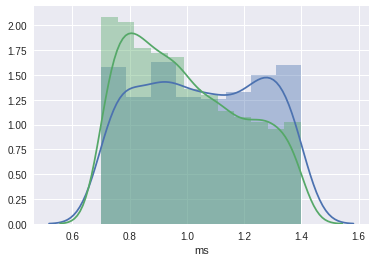

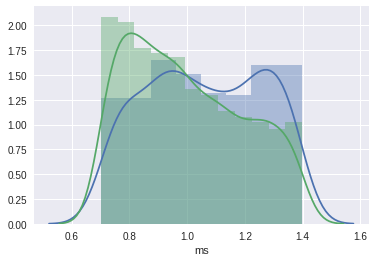

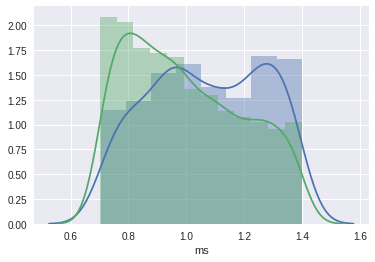

In [71]:
sns.distplot(dfhn.ms) # same thing happens w sigmag_0, which is a function of md and ac, but there is no corr to ac
sns.distplot(dfpno.ms)
plt.show()
sns.distplot(dfhl.ms)
sns.distplot(dfplo.ms)
plt.show()
sns.distplot(dfhh.ms)
sns.distplot(dfphi.ms)
plt.show()

## Systems with only terrestrial planets

In [72]:
print("Total systems:",len(dfhn),len(dfhl),len(dfhh))
print("Systems with only terrestrial planets:",(~dfhn.gia).sum(),(~dfhl.gia).sum(),(~dfhh.gia).sum())

Total systems: 465 418 401
Systems with only terrestrial planets: 434 375 359


- Higher metallicity favors planet formation - slightly (for only terrestrial planets in HZ situation)

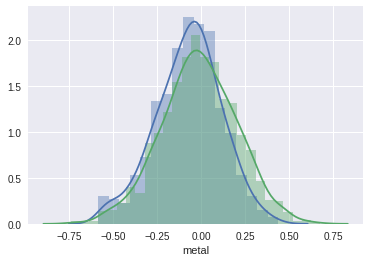

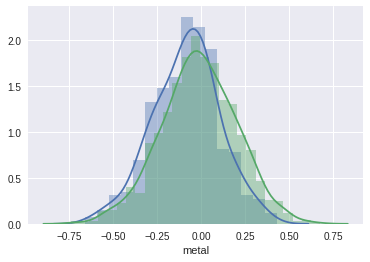

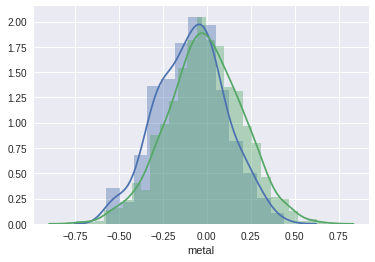

In [73]:
sns.distplot(dfhn.metal[~dfhn.gia])
sns.distplot(dfpno.metal)
plt.show()
sns.distplot(dfhl.metal[~dfhl.gia])
sns.distplot(dfplo.metal)
plt.show()
sns.distplot(dfhh.metal[~dfhh.gia])
sns.distplot(dfphi.metal)
plt.show()

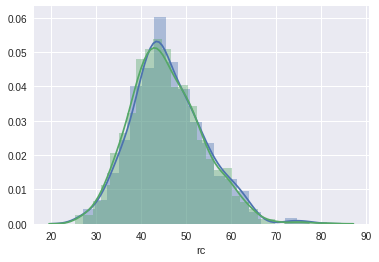

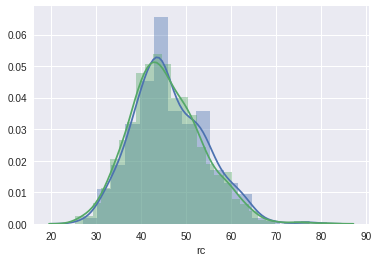

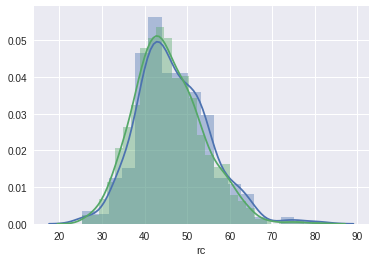

In [74]:
sns.distplot(dfhn.rc[~dfhn.gia])
sns.distplot(dfpno.rc)
plt.show()
sns.distplot(dfhl.rc[~dfhl.gia])
sns.distplot(dfplo.rc)
plt.show()
sns.distplot(dfhh.rc[~dfhh.gia])
sns.distplot(dfphi.rc)
plt.show()

- Highly perturbed systems create more planets in HZ (for only terrestrial planets in HZ situation)
    - For non-perturbed situation, 43 percent of systems create > 2 planets
    - For perturbed situation, 51 percent of systems create > 2 planets

43.66359447
47.2
51.3927576602


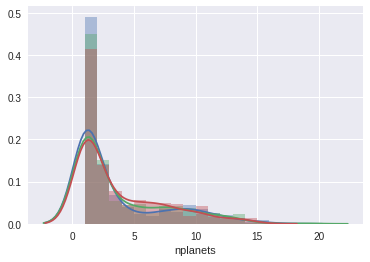

In [75]:
sns.distplot(dfhn.nplanets[~dfhn.gia],bins=range(20))
print(100-stats.percentileofscore(dfhn.nplanets[~dfhn.gia],2))
sns.distplot(dfhl.nplanets[~dfhl.gia],bins=range(20))
print(100-stats.percentileofscore(dfhl.nplanets[~dfhl.gia],2))
sns.distplot(dfhh.nplanets[~dfhh.gia],bins=range(20))
print(100-stats.percentileofscore(dfhh.nplanets[~dfhh.gia],2))

(array([   0.,  149.,   50.,   28.,   16.,   20.,   18.,   18.,   17.,
           7.,   15.,    6.,    4.,    5.,    5.,    1.,    0.,    0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

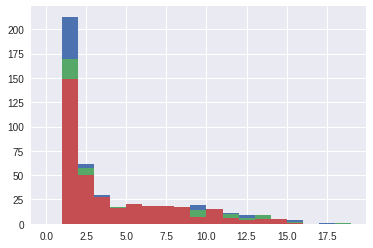

In [76]:
plt.hist(dfhn.nplanets[~dfhn.gia],bins=range(20))
plt.hist(dfhl.nplanets[~dfhl.gia],bins=range(20))
plt.hist(dfhh.nplanets[~dfhh.gia],bins=range(20))

- Mass budget for planets in HZ is not strongly dependent on perturbation
    - 74 percent of systems have more than 1 earth mass in HZ for non-perturbed case
    - 68 percent of systems have more than 1 earth mass in HZ for perturbed case
    - Slightly more low-mass planets for perturbed case

4.64838676127
73.9631336406
3.85123090193
72.8
4.5126810252
67.9665738162


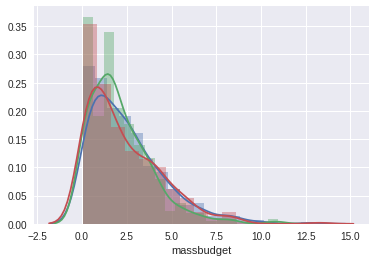

In [77]:
sns.distplot(dfhn.massbudget[~dfhn.gia])
print(np.percentile(dfhn.massbudget[~dfhn.gia],86))
print(100-stats.percentileofscore(dfhn.massbudget[~dfhn.gia],1))
sns.distplot(dfhl.massbudget[~dfhl.gia])
print(np.percentile(dfhl.massbudget[~dfhl.gia],86))
print(100-stats.percentileofscore(dfhl.massbudget[~dfhl.gia],1))
sns.distplot(dfhh.massbudget[~dfhh.gia])
print(np.percentile(dfhh.massbudget[~dfhh.gia],86))
print(100-stats.percentileofscore(dfhh.massbudget[~dfhh.gia],1))

(array([ 115.,   78.,   50.,   45.,   30.,   21.,    9.,    4.,    6.,
           0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

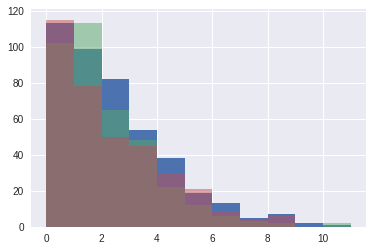

In [78]:
plt.hist(dfhn.massbudget[~dfhn.gia],bins=range(12))
plt.hist(dfhl.massbudget[~dfhl.gia],bins=range(12),alpha=0.5)
plt.hist(dfhh.massbudget[~dfhh.gia],bins=range(12),alpha=0.5)

- Perturbed systems have a smaller average HZ planet mass
    - 63 percent of non-perturbed systems have an average planet mass below 2 earth masses
    - 71 percent of perturbed systems have an average planet mass below 2 earth masses

3.86534958697
62.9032258065
3.20439501178
70.1333333333
3.81294581728
70.4735376045


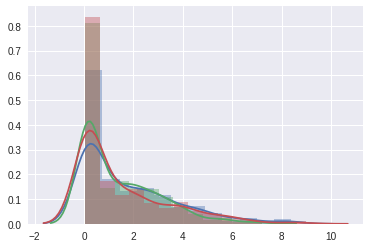

In [79]:
sns.distplot(dfhn.massbudget[~dfhn.gia]/dfhn.nplanets[~dfhn.gia])
print(np.percentile(dfhn.massbudget[~dfhn.gia]/dfhn.nplanets[~dfhn.gia],86))
print(stats.percentileofscore(dfhn.massbudget[~dfhn.gia]/dfhn.nplanets[~dfhn.gia],2,kind='mean'))
sns.distplot(dfhl.massbudget[~dfhl.gia]/dfhl.nplanets[~dfhl.gia])
print(np.percentile(dfhl.massbudget[~dfhl.gia]/dfhl.nplanets[~dfhl.gia],86))
print(stats.percentileofscore(dfhl.massbudget[~dfhl.gia]/dfhl.nplanets[~dfhl.gia],2,kind='mean'))
sns.distplot(dfhh.massbudget[~dfhh.gia]/dfhh.nplanets[~dfhh.gia])
print(np.percentile(dfhh.massbudget[~dfhh.gia]/dfhh.nplanets[~dfhh.gia],86))
print(stats.percentileofscore(dfhh.massbudget[~dfhh.gia]/dfhh.nplanets[~dfhh.gia],2,kind='mean'))

(array([ 201.,   52.,   35.,   31.,   17.,   13.,    6.,    1.,    3.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

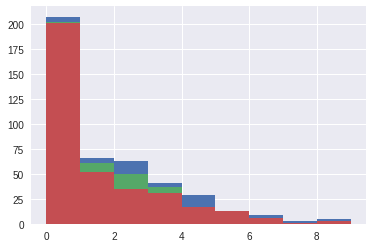

In [80]:
plt.hist(dfhn.massbudget[~dfhn.gia]/dfhn.nplanets[~dfhn.gia],bins=range(10))
plt.hist(dfhl.massbudget[~dfhl.gia]/dfhl.nplanets[~dfhl.gia],bins=range(10))
plt.hist(dfhh.massbudget[~dfhh.gia]/dfhh.nplanets[~dfhh.gia],bins=range(10))

In [81]:
dff.head()

Unnamed: 0  ident      it           t      a(i)     emegas(i)  \
14           34      3  199921  20000001.0  0.786950  1.764239e+03   
37           66      6  199902  20000001.0  1.073026  2.934387e+03   
47           76      7  199958  20000001.0  0.671829  6.122073e-01   
101         158     16  199400  20000001.0  1.273347  1.225720e-06   
102         159     16  199400  20000001.0  1.560116  2.224584e-09   

     emepla(i)/emet  rplanet(i)/radtie       emestar         rc      qest  \
14      1769.722996           2.704261  1.760227e+33  29.539343  8.421395   
37      2944.097744           3.285512  1.723190e+33  47.343380  4.412694   
47         4.452167           2.398828  1.684423e+33  42.739063  2.716673   
101        0.416841           0.853761  2.517494e+33  45.042137  4.469478   
102        0.145076           0.614417  2.517494e+33  45.042137  4.469478   

       sigmag_0   emed  gama  apert  fpert  constmigI    emetal       taugas  \
14    90.793337  0.056   1.0    0.3    1.0        0.1  0.328146  1644710.625   
37    75.740878  0.120   1.0    0.3    1.0        0.1  0.021273  1790533.125   
47   139.408777  0.180   1.0    0.3    1.0        0.1 -0.092571  2721394.750   
101  118.543720  0.170   1.0    0.3    1.0        0.1 -0.352459  1107031.750   
102  118.543720  0.170   1.0    0.3    1.0        0.1 -0.352459  1107031.750   

            mass  
14   3533.961589  
37   5878.484819  
47      5.064374  
101     0.416842  
102     0.145076

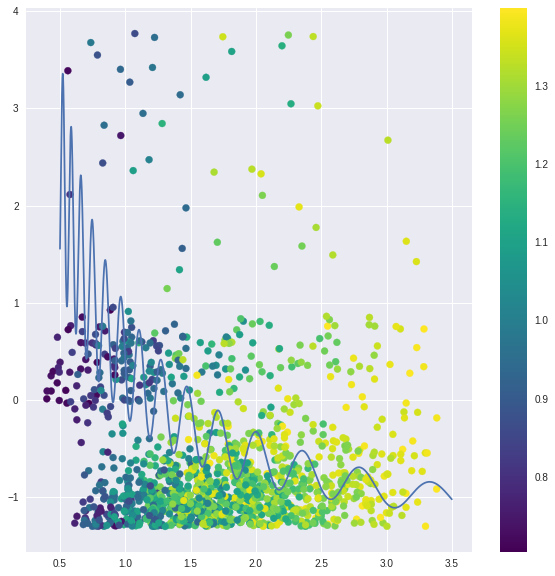

In [82]:
a=np.linspace(0.5,3.5,10000)
apert=0.3
fpert=1.
gama=1.
rc=20
plt.figure(figsize=(10,10))
plt.scatter(dff['a(i)'],np.log10(dff.mass),c=dff.emestar/2e33,cmap='viridis')
plt.colorbar()
plt.plot(a,-1.5+2*((a**(-gama)*np.exp(-(a/rc)**(2.-gama))*(1+apert*np.cos(2.*np.pi*a/(fpert*0.03361386903*a**(5./4.)))))))

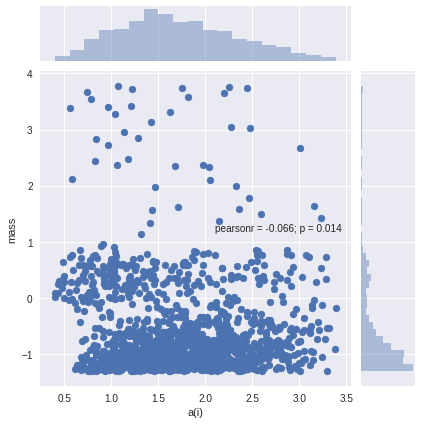

In [83]:
sns.jointplot(x=dff['a(i)'],y=np.log10(dff.mass))

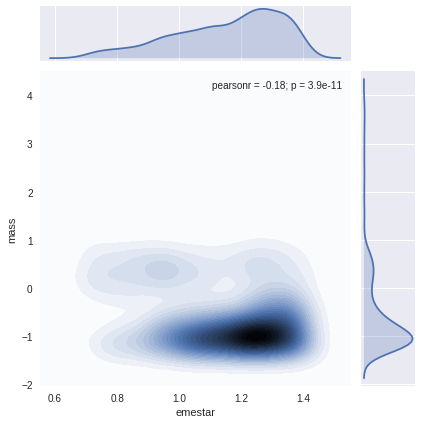

In [84]:
sns.jointplot(x=dff.emestar/2e33,y=np.log10(dff.mass),kind='kde',n_levels=30)

In [85]:
dfhn.columns

Index(['Unnamed: 0', 'ident', 'com', 'nplanets', 'massbudget',
       'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',
       'qest', 'ngi', 'mtr', 'apert', 'gia'],
      dtype='object')

- Plausible correlations:
    - massbudget - disk mass
    - massbudtet - taugas
    - com - disk mass for perturbed 
    - nplanets - ms
    - nplanets - com
    - com - ms -> this is obvious, as HZ depends on stellar mass

In [86]:
dfpp=dfhn[['com','nplanets','massbudget','md','rc','ms','metal','taugas']][~dfhn.gia]

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


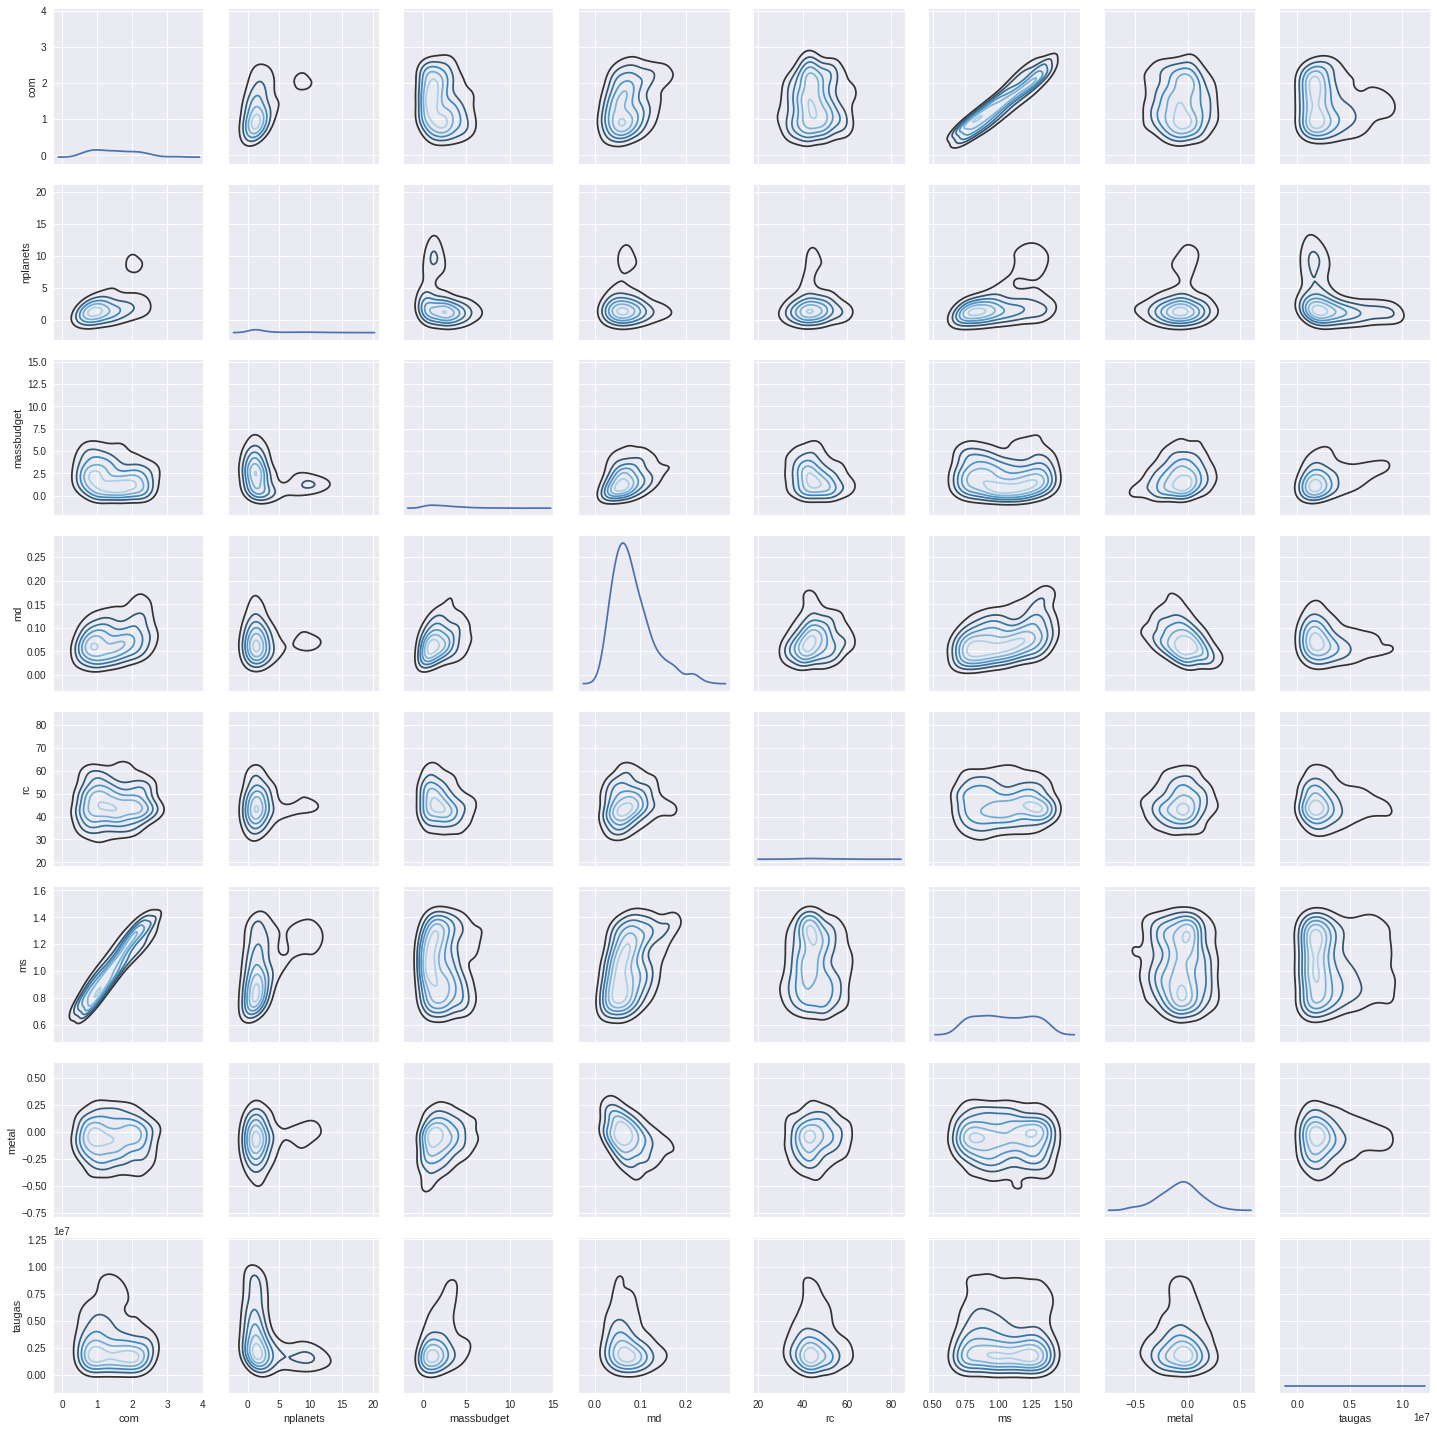

In [87]:
g = sns.PairGrid(dfpp)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

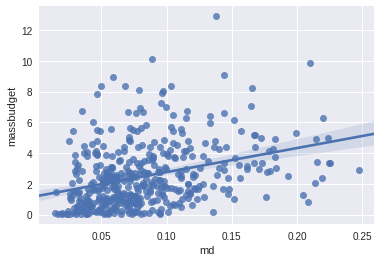

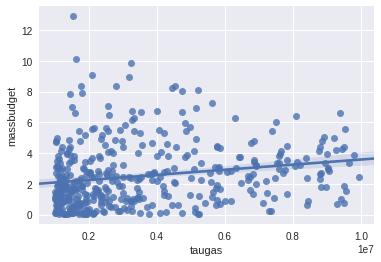

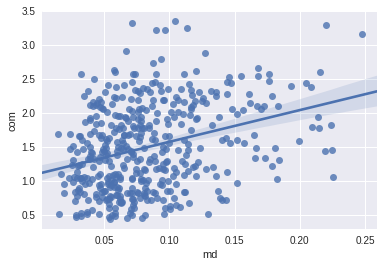

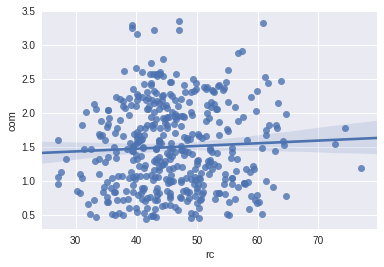

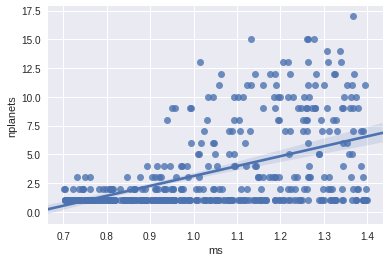

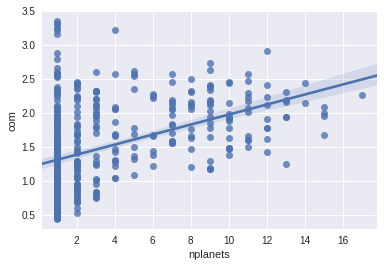

In [88]:
sns.regplot(dfpp.md,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.taugas,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.md,dfpp.com)
plt.show()
sns.regplot(dfpp.rc,dfpp.com)
plt.show()
sns.regplot(dfpp.ms,dfpp.nplanets)
plt.show()
sns.regplot(dfpp.nplanets,dfpp.com)
plt.show()

In [89]:
dfpp=dfhl[['com','nplanets','massbudget','md','rc','ms','metal','taugas']][~dfhl.gia]

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


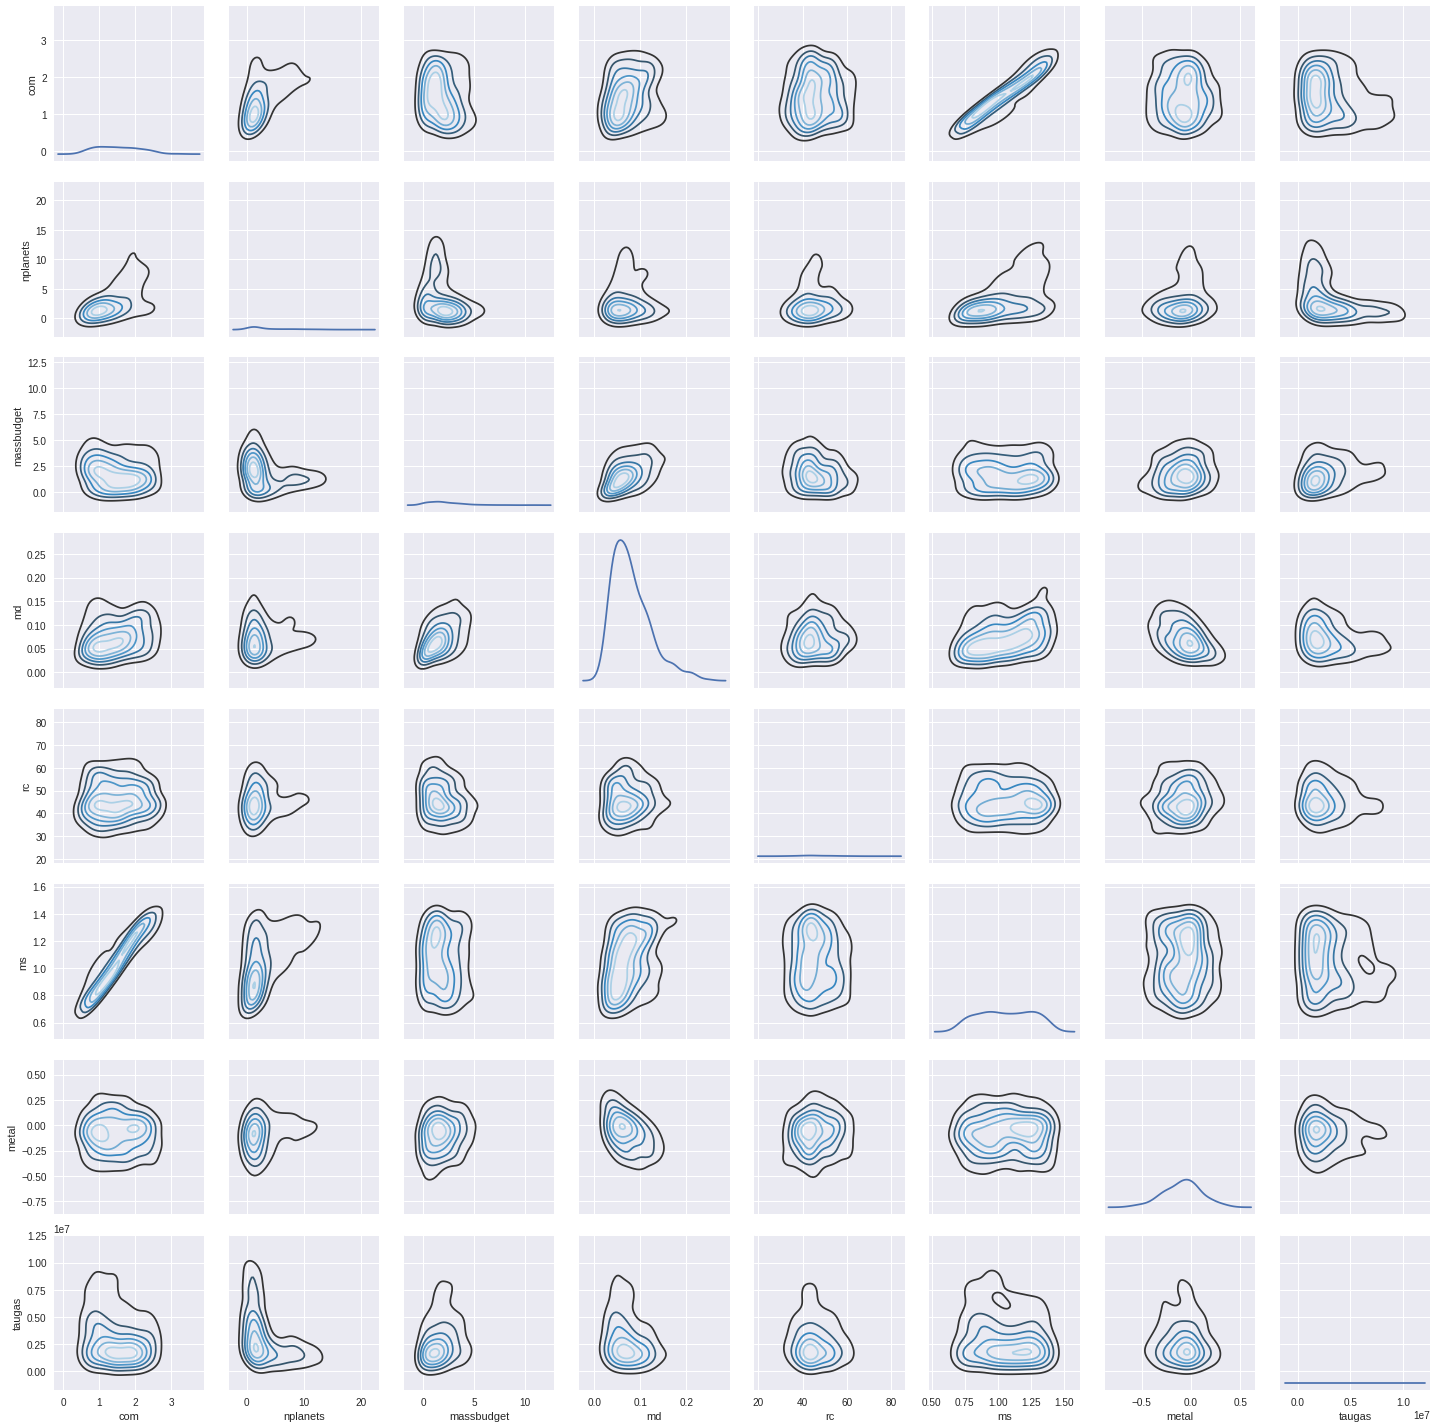

In [90]:
g = sns.PairGrid(dfpp)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

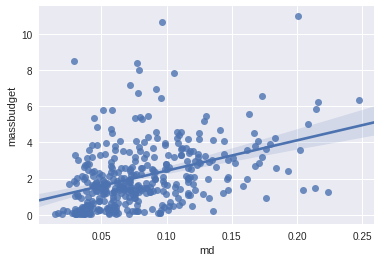

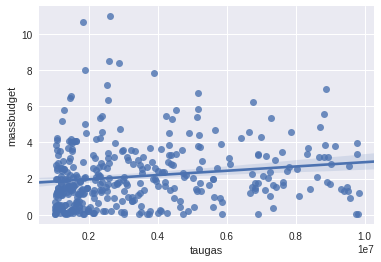

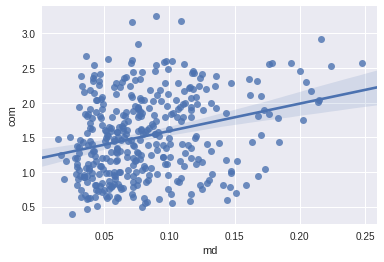

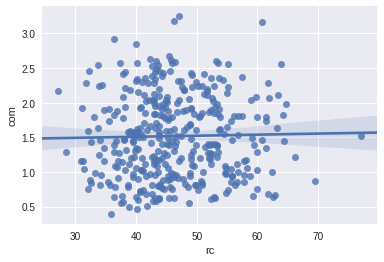

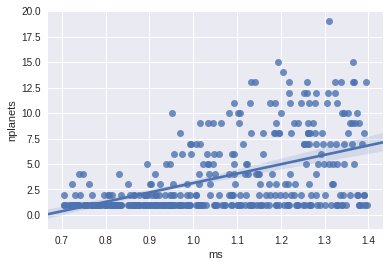

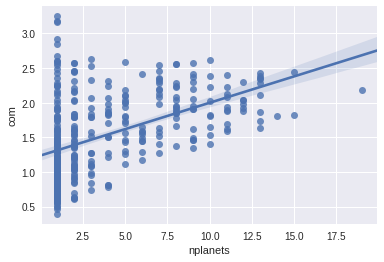

In [91]:
sns.regplot(dfpp.md,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.taugas,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.md,dfpp.com)
plt.show()
sns.regplot(dfpp.rc,dfpp.com)
plt.show()
sns.regplot(dfpp.ms,dfpp.nplanets)
plt.show()
sns.regplot(dfpp.nplanets,dfpp.com)
plt.show()

In [92]:
dfpp=dfhh[['com','nplanets','massbudget','md','rc','ms','metal','taugas']][~dfhh.gia]

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


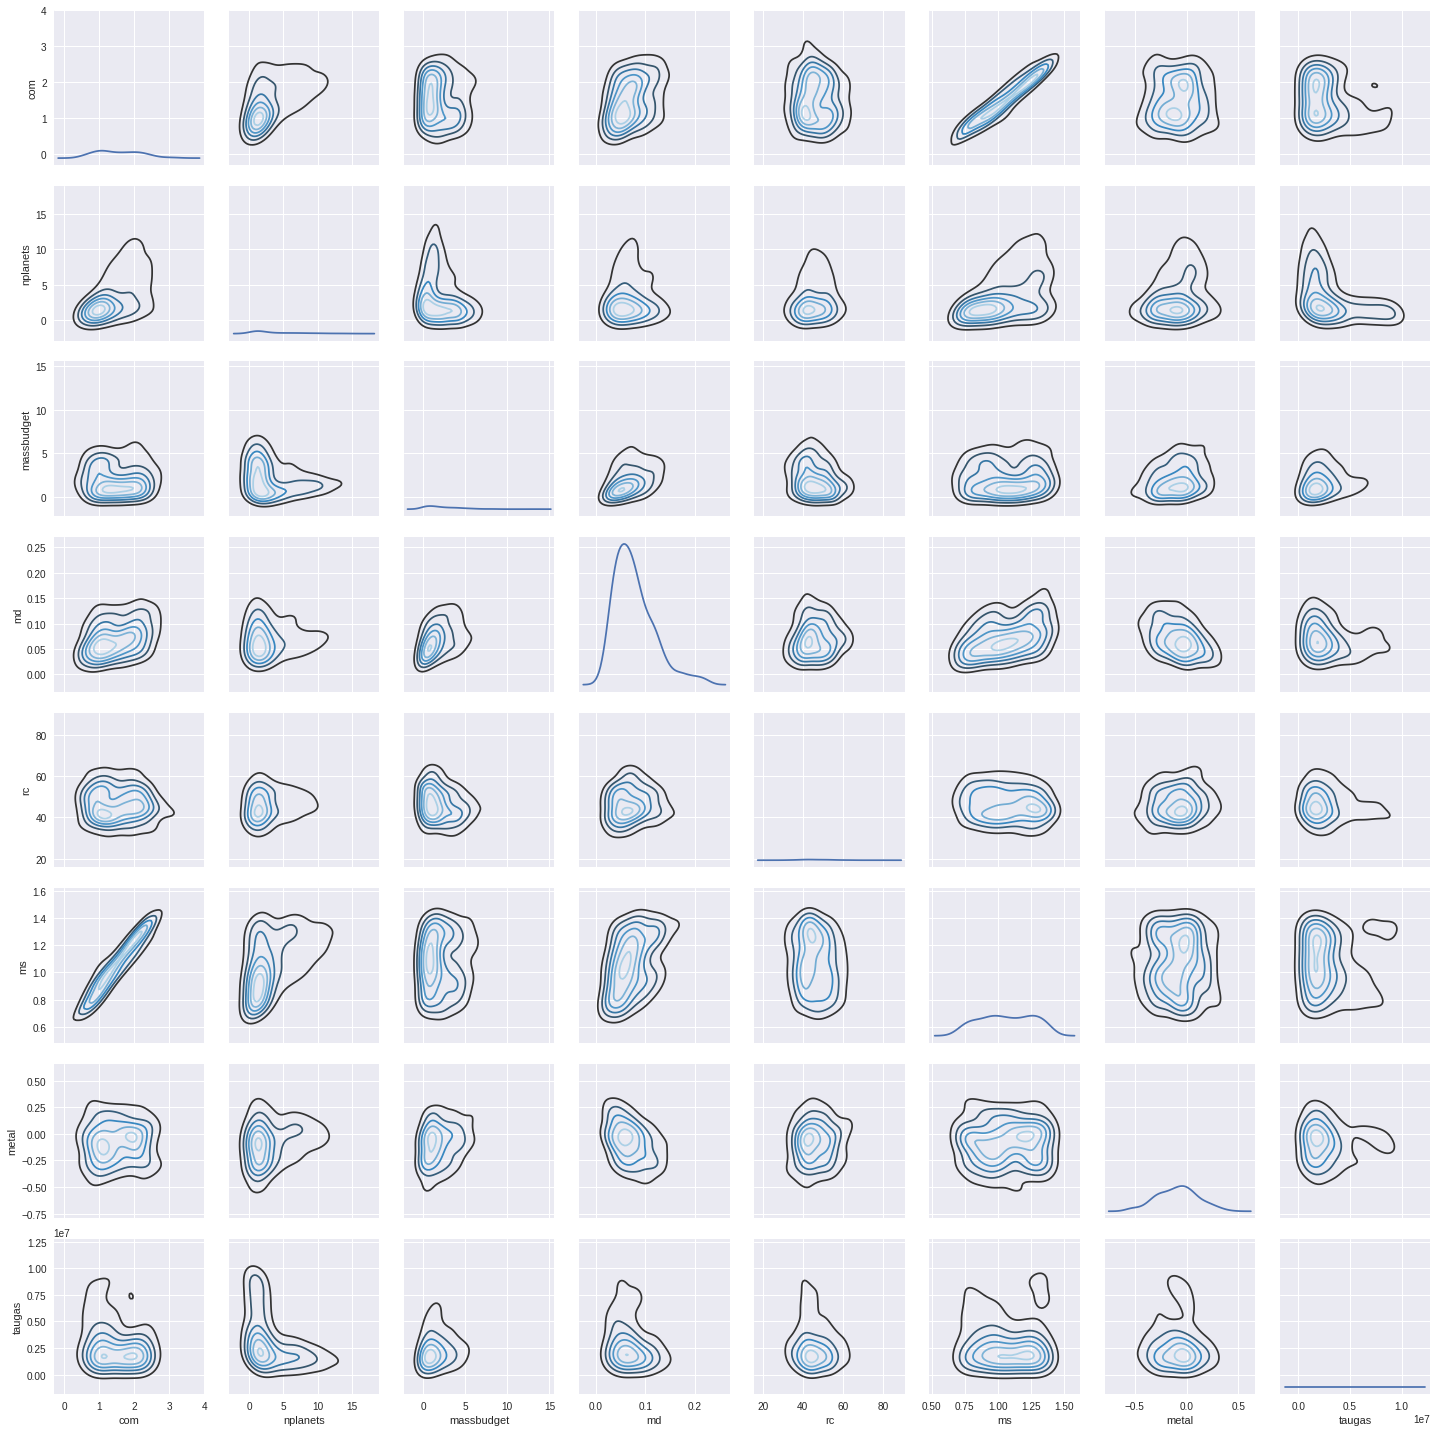

In [93]:
g = sns.PairGrid(dfpp)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

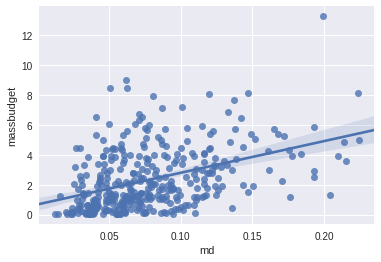

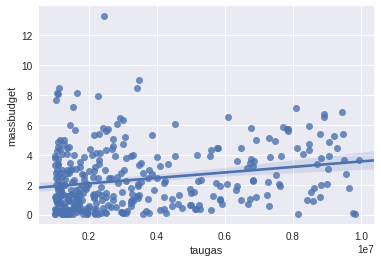

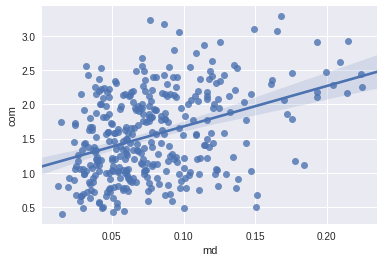

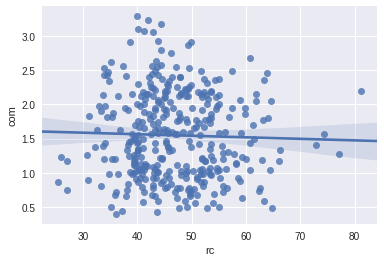

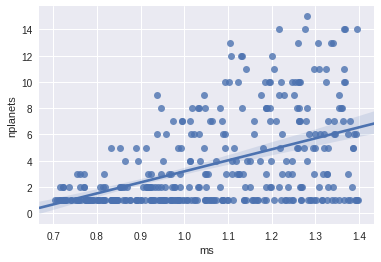

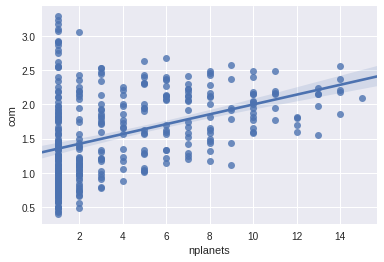

In [94]:
sns.regplot(dfpp.md,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.taugas,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.md,dfpp.com)
plt.show()
sns.regplot(dfpp.rc,dfpp.com)
plt.show()
sns.regplot(dfpp.ms,dfpp.nplanets)
plt.show()
sns.regplot(dfpp.nplanets,dfpp.com)
plt.show()

## Systems w/ giant planets

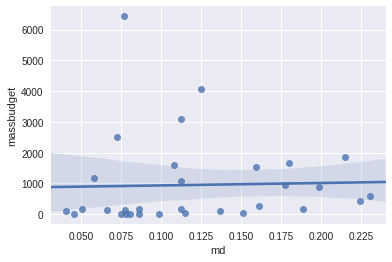

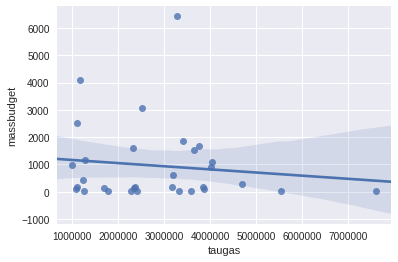

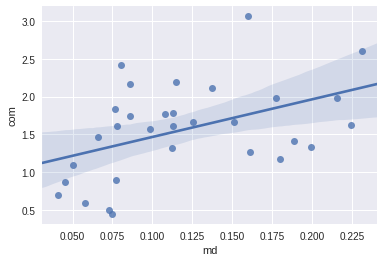

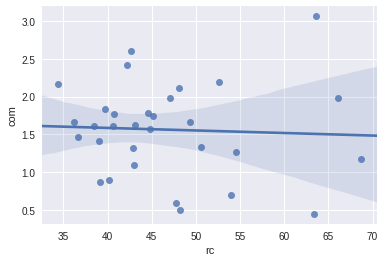

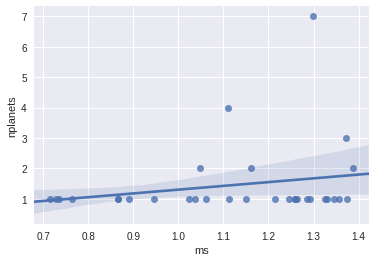

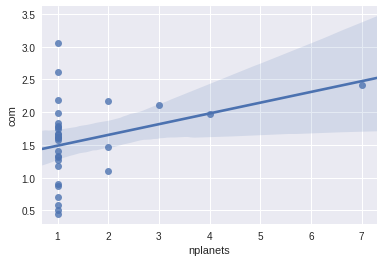

In [95]:
dfpp=dfhn[['com','nplanets','massbudget','md','rc','ms','metal','taugas']][dfhn.gia]
sns.regplot(dfpp.md,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.taugas,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.md,dfpp.com)
plt.show()
sns.regplot(dfpp.rc,dfpp.com)
plt.show()
sns.regplot(dfpp.ms,dfpp.nplanets)
plt.show()
sns.regplot(dfpp.nplanets,dfpp.com)
plt.show()

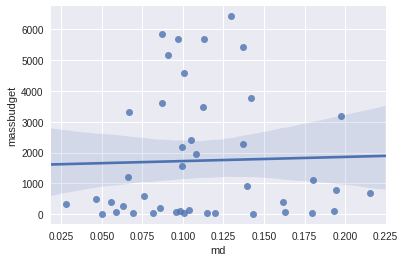

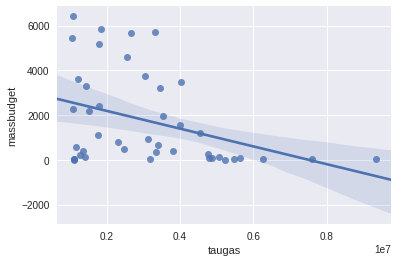

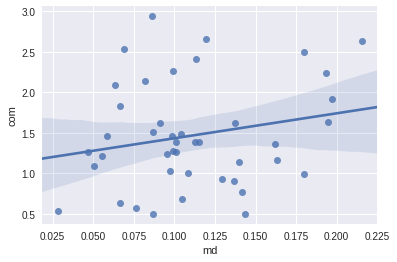

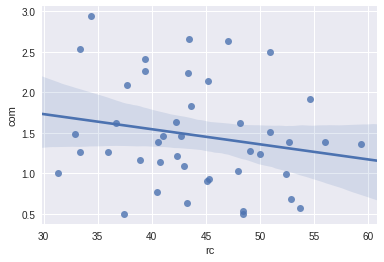

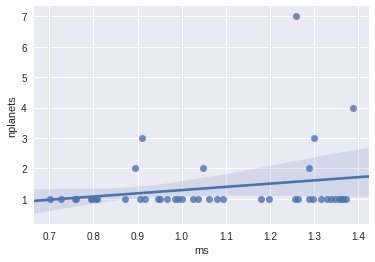

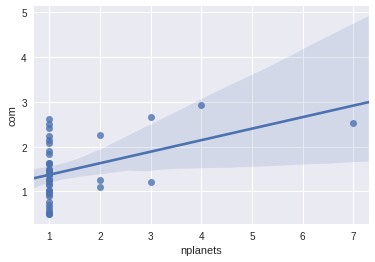

In [96]:
dfpp=dfhl[['com','nplanets','massbudget','md','rc','ms','metal','taugas']][dfhl.gia]
sns.regplot(dfpp.md,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.taugas,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.md,dfpp.com)
plt.show()
sns.regplot(dfpp.rc,dfpp.com)
plt.show()
sns.regplot(dfpp.ms,dfpp.nplanets)
plt.show()
sns.regplot(dfpp.nplanets,dfpp.com)
plt.show()

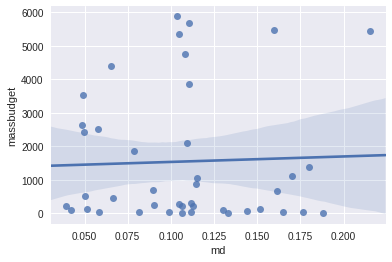

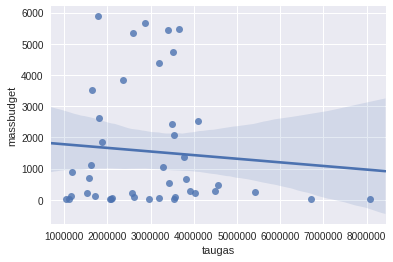

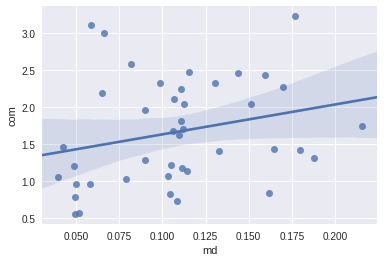

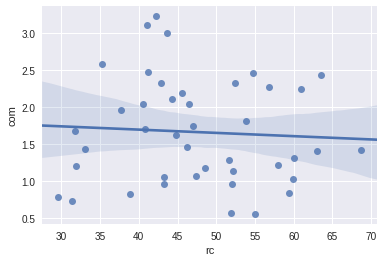

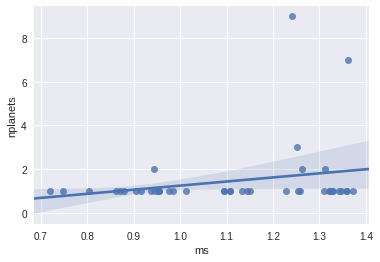

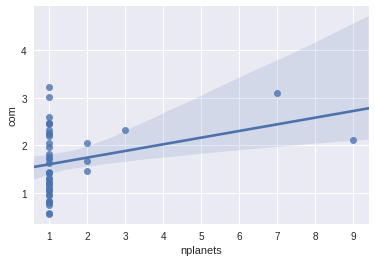

In [97]:
dfpp=dfhh[['com','nplanets','massbudget','md','rc','ms','metal','taugas']][dfhh.gia]
sns.regplot(dfpp.md,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.taugas,dfpp.massbudget)
plt.show()
sns.regplot(dfpp.md,dfpp.com)
plt.show()
sns.regplot(dfpp.rc,dfpp.com)
plt.show()
sns.regplot(dfpp.ms,dfpp.nplanets)
plt.show()
sns.regplot(dfpp.nplanets,dfpp.com)
plt.show()

In [98]:
print("Total systems:",len(dfhn),len(dfhl),len(dfhh))
print("Systems with giant planets:",(dfhn.gia).sum(),(dfhl.gia).sum(),(dfhh.gia).sum())

Total systems: 465 418 401
Systems with giant planets: 31 43 42


- Systems with higher metallicity create more giant planets in HZ

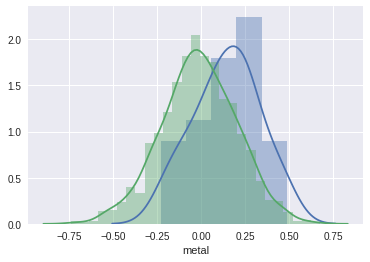

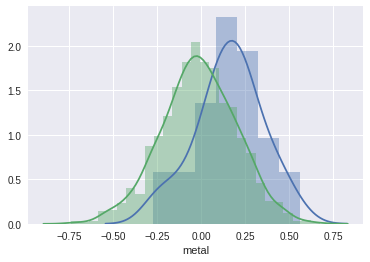

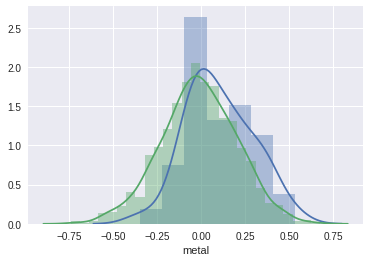

In [99]:
sns.distplot(dfhn.metal[dfhn.gia])
sns.distplot(dfpno.metal)
plt.show()
sns.distplot(dfhl.metal[dfhl.gia])
sns.distplot(dfplo.metal)
plt.show()
sns.distplot(dfhh.metal[dfhh.gia])
sns.distplot(dfphi.metal)
plt.show()

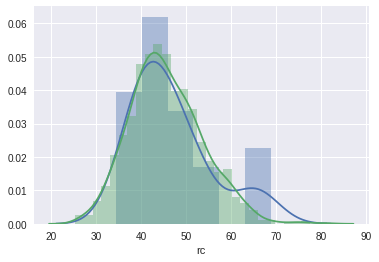

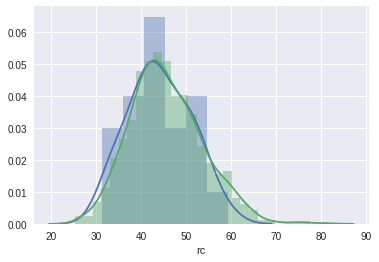

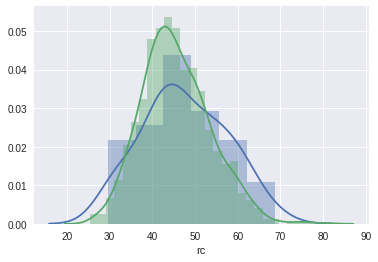

In [100]:
sns.distplot(dfhn.rc[dfhn.gia])
sns.distplot(dfpno.rc)
plt.show()
sns.distplot(dfhl.rc[dfhl.gia])
sns.distplot(dfplo.rc)
plt.show()
sns.distplot(dfhh.rc[dfhh.gia])
sns.distplot(dfphi.rc)
plt.show()

- Systems with higher disk mass create more giant planets in HZ

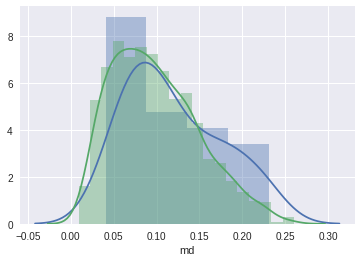

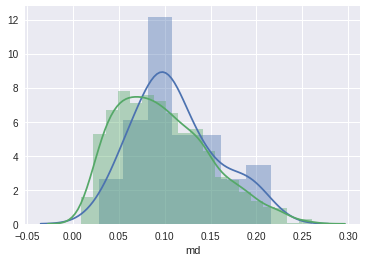

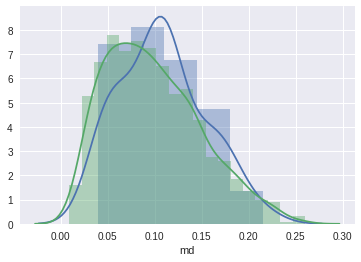

In [101]:
sns.distplot(dfhn.md[dfhn.gia])
sns.distplot(dfpno.md)
plt.show()
sns.distplot(dfhl.md[dfhl.gia])
sns.distplot(dfplo.md)
plt.show()
sns.distplot(dfhh.md[dfhh.gia])
sns.distplot(dfphi.md)
plt.show()

- Higher mass stars are more likely to create giant planets in HZ (more than for HZ-terr-only systems)

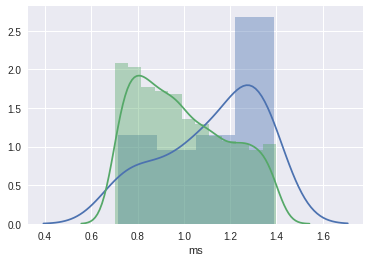

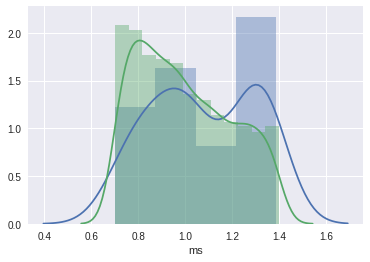

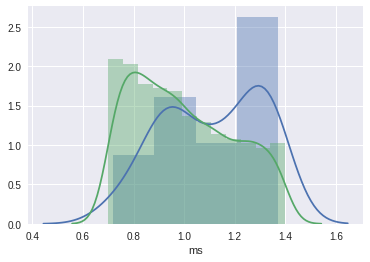

In [102]:
sns.distplot(dfhn.ms[dfhn.gia])
sns.distplot(dfpno.ms)
plt.show()
sns.distplot(dfhl.ms[dfhl.gia])
sns.distplot(dfplo.ms)
plt.show()
sns.distplot(dfhh.ms[dfhh.gia])
sns.distplot(dfphi.ms)
plt.show()

- Perturbed systems create more giant planets in HZ

1814.71673747
4656.50394921
4488.88619859


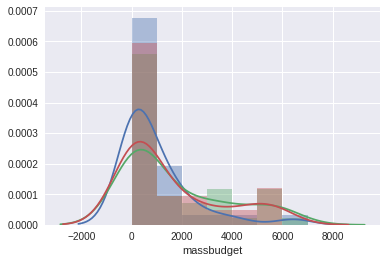

In [103]:
sns.distplot(dfhn.massbudget[dfhn.gia],bins=range(0,8000,1000))
print(np.percentile(dfhn.massbudget[dfhn.gia],86))
sns.distplot(dfhl.massbudget[dfhl.gia],bins=range(0,8000,1000))
print(np.percentile(dfhl.massbudget[dfhl.gia],86))
sns.distplot(dfhh.massbudget[dfhh.gia],bins=range(0,8000,1000))
print(np.percentile(dfhh.massbudget[dfhh.gia],86))

In [104]:
100*dfhn.nplanets.sum()/dfpno.nplanets.sum(),100*dfhl.nplanets.sum()/dfplo.nplanets.sum(),100*dfhh.nplanets.sum()/dfphi.nplanets.sum()

(9.8207034422440174, 9.0674065199571228, 9.0295629820051406)